# Big Mart Sales Prediction
### Capstone Project

**Name:** Samruddhi Sandeep Kulkarni<br>
**Email ID:** samruddhi.kulkarni2002@gmail.com<br>
**Branch:** Artificial Intelligence And Data Science 

**Objective:**<br>
     Sales of a given product at a retail store can depend both on store attributes as well as product attributes. Our objective is **to explore and build data science model for the prediction  of future sales.**

**Data Source:**<br>
The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.<br>
Using this model, Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.<br>
<br>
Link to the dataset is given below:<br>
https://www.kaggle.com/akashdeepkuila/big-mart-sales<br>

**Content:**
The dataset provides the product details and the outlet information of the products purchased with their sales value split into a train set (8523) and a test (5681) set.<br>
Train file: CSV containing the item outlet information with sales value<br>
Test file: CSV containing item outlet combinations for which sales need to be forecasted<br>

**Variable Description**<br>
ProductID : unique product ID<br>
Weight : weight of products<br>
FatContent : specifies whether the product is low on fat or not<br>
Visibility : percentage of total display area of all products in a store allocated to the particular product<br>
ProductType : the category to which the product belongs<br>
MRP : Maximum Retail Price (listed price) of the products<br>
OutletID : unique store ID<br>
EstablishmentYear : year of establishment of the outlets<br>
OutletSize : the size of the store in terms of ground area covered<br>
LocationType : the type of city in which the store is located<br>
OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket<br>
OutletSales : (target variable) sales of the product in the particular store


## Import Liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings           # It is used to avoid unnecessary information printed by modules
%matplotlib inline
warnings.filterwarnings('ignore')

## Import Data

In [5]:
df = pd.read_csv("C:\Downloads\Train-Set.csv")

**Print the first 10 rows of a dataframe**<br>
df.head(n) function returns first 'n' number of rows present in the dataset<br>
Default value of head() function is 5. i.e. it prints first 5 rows

In [3]:
df.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


**Print the last 10 rows of a dataframe**<br>
df.tail(n) function returns last 'n' number of rows present in the dataset<br>
Default value of tail() function is 5. i.e. it prints last 5 rows

In [6]:
df.tail(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Describe the Data

**shape attribute** returns a two-item tuple of the number of rows and the number of columns in the DataFrame. Basically it returns a tuple representing the dimensionality of the DataFrame.

In [7]:
df.shape

(8523, 12)

**size attibute** returns an int representing the number of elements in this object (df in this case)<br>
Return the number of rows if Series. Otherwise return the number of rows times number of columns if DataFrame.

In [8]:
df.size
#Returns rows*column i.e. 8523*12

102276

**df.info()** method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.<br>
<br>
**Syntax:** DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None, null_counts=None)<br>
<br>
From the below output, we can say that there are 7 Categorical variables (Dtype = object) and 5 Numerical variables (Dtype = float64, int64) present in this dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**df.isnull()** returns a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.<br>
While **df.isnull().sum()** returns count of NA values present in each feature. 

In [10]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

From Above output, we can see that **'Weight' and 'OutletSize'** has large number of missing values.<br> 
**Weight = Numerical Variable<br>
OutletSize = Categorical Variable**<br>
<br>
We can perform mean, median and mode operations on the numerical variables but can perform only mode operation on categorical variable.

## Describe Function<br>
**df.describe()** generates descriptive statistics of provided series or dataframe.<br>
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.<br>
<br>
**Syntax:** DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

In [11]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
df.apply(lambda x: len(x.unique())) 
# It prints count of unique values present in each feature.

ProductID            1559
Weight                416
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              4
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

In [13]:
# Check for the categorical variables
cat_variables = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_variables.append(x)
print("List of categorical variables is: " + str(cat_variables))

List of categorical variables is: ['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']


In [14]:
# For sales prediction, we does not require ProductID and OutletID variables. So, we will remove that variables.

cat_variables.remove('ProductID')
cat_variables.remove('OutletID')
print("List of categorical variables is: " + str(cat_variables))

List of categorical variables is: ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']


In [15]:
# We have to print individual count of different values present in each categorical variable.
for col in cat_variables:
    print(col)
    print(df[col].value_counts())
    print()

FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ProductType, dtype: int64

OutletSize
Medium    2793
Small     2388
High       932
Name: OutletSize, dtype: int64

LocationType
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: LocationType, dtype: int64

OutletType
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64



## Fill the missing values 

In [16]:
weight_mean = df.pivot_table(values = "Weight", index = "ProductID")
weight_mean

,Weight
ProductID,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [17]:
miss_weight = df["Weight"].isnull()
miss_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Weight, Length: 8523, dtype: bool

In [18]:
for i, item in enumerate(df["ProductID"]):
    if miss_weight[i]:
        if item in weight_mean:
            df['Weight'][i] = weight_mean.loc[item]['Weight']
        else:
            df['Weight'][i] = np.mean(df['Weight'])   

In [19]:
df["Weight"].isnull().sum()

0

In [20]:
OutletSize_mode = df.pivot_table(values = "OutletSize", columns = "OutletType", aggfunc = (lambda x: x.mode()[0]))
OutletSize_mode

OutletType,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
OutletSize,Small,Small,Medium,Medium


From above output, we can say that Grocery Store type contains Small OutletSize most of the times. Similarly, we can see for other OutletTypes also.

In [21]:
miss_OutletSize = df['OutletSize'].isnull()
df.loc[miss_OutletSize, 'OutletSize'] = df.loc[miss_OutletSize, 'OutletType'].apply(lambda x: OutletSize_mode[x])

df['OutletSize'].isnull().sum()

0

In [22]:
sum(df['ProductVisibility']==0)

526

In [23]:
# 526 ProductVisibility values are 0. So, we have to replace it with mean value.
df.loc[:, 'ProductVisibility'].replace([0], [df['ProductVisibility'].mean()], inplace = True)

In [24]:
sum(df['ProductVisibility']==0)

0

In [25]:
print(df.FatContent.unique())
# Here we can see that 'Low Fat', 'low fat' and 'LF' are representing the same attrinute with different names. 
# Also, 'Regular' and 'reg' are same. So we have to combine them together.
df.FatContent.value_counts()

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [26]:
# We will create a dictionary to replace that values.
df['FatContent'] = df['FatContent'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}) 

print(df.FatContent.unique())
df.FatContent.value_counts()

['Low Fat' 'Regular']


Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

## Creation of New Attribute

In [27]:
df['New_ProductType'] = df['ProductID'].apply(lambda x: x[:2])

print(df.New_ProductType.unique())
df.New_ProductType.value_counts()
# Here 'FD', 'DR', 'NC' represents Food, Drink and Non-consumable items.

['FD' 'DR' 'NC']


FD    6125
NC    1599
DR     799
Name: New_ProductType, dtype: int64

In [28]:
df['New_ProductType'] = df['New_ProductType'].map({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
df['New_ProductType'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: New_ProductType, dtype: int64

In [29]:
df.loc[df['New_ProductType'] == 'Non-Consumable', 'FatContent'] = 'Non-Edible'
df['FatContent'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: FatContent, dtype: int64

In [30]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,New_ProductType
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


## Visualization of the data

<AxesSubplot:xlabel='Weight', ylabel='Density'>

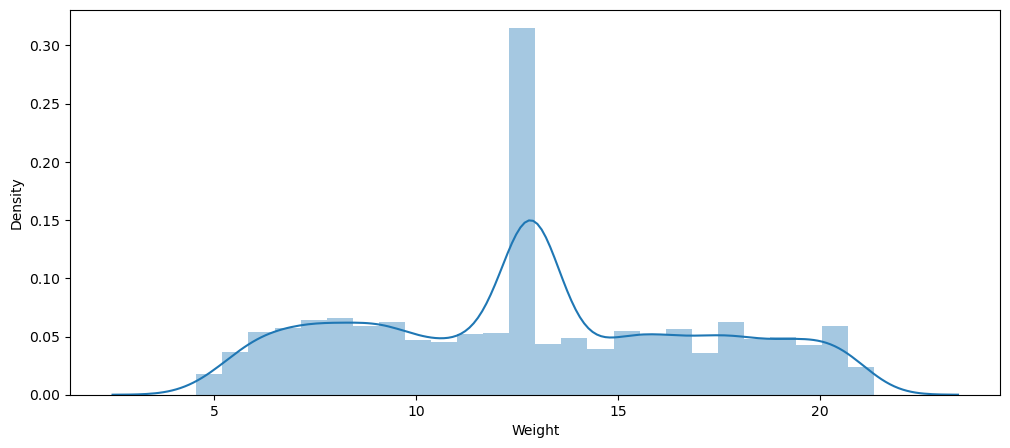

In [31]:
plt.figure(figsize=(12,5))
sns.distplot(df['Weight'])

# High density of weight in middle is due to the replacing NAN/NULL/0 values with mean value.

In [32]:
# log transformation
df['OutletSales'] = np.log(1+df['OutletSales'])


<AxesSubplot:xlabel='OutletSales', ylabel='Density'>

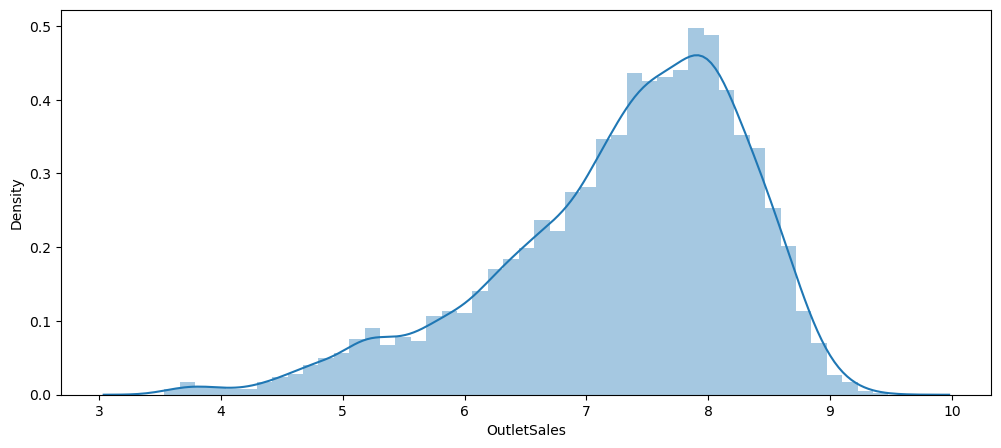

In [33]:
plt.figure(figsize=(12,5))
sns.distplot(df['OutletSales'])

<AxesSubplot:xlabel='FatContent', ylabel='count'>

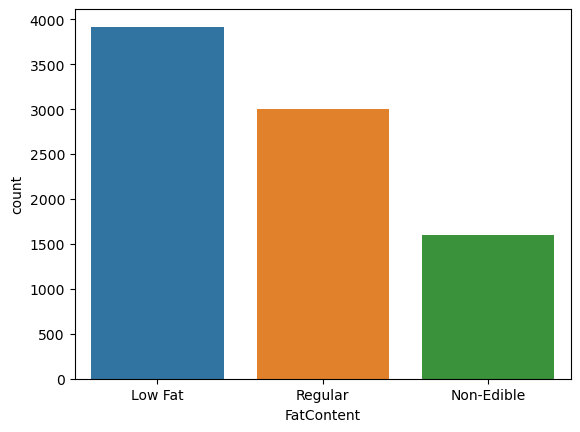

In [34]:
sns.countplot(df['FatContent'])

<AxesSubplot:xlabel='ProductType', ylabel='count'>

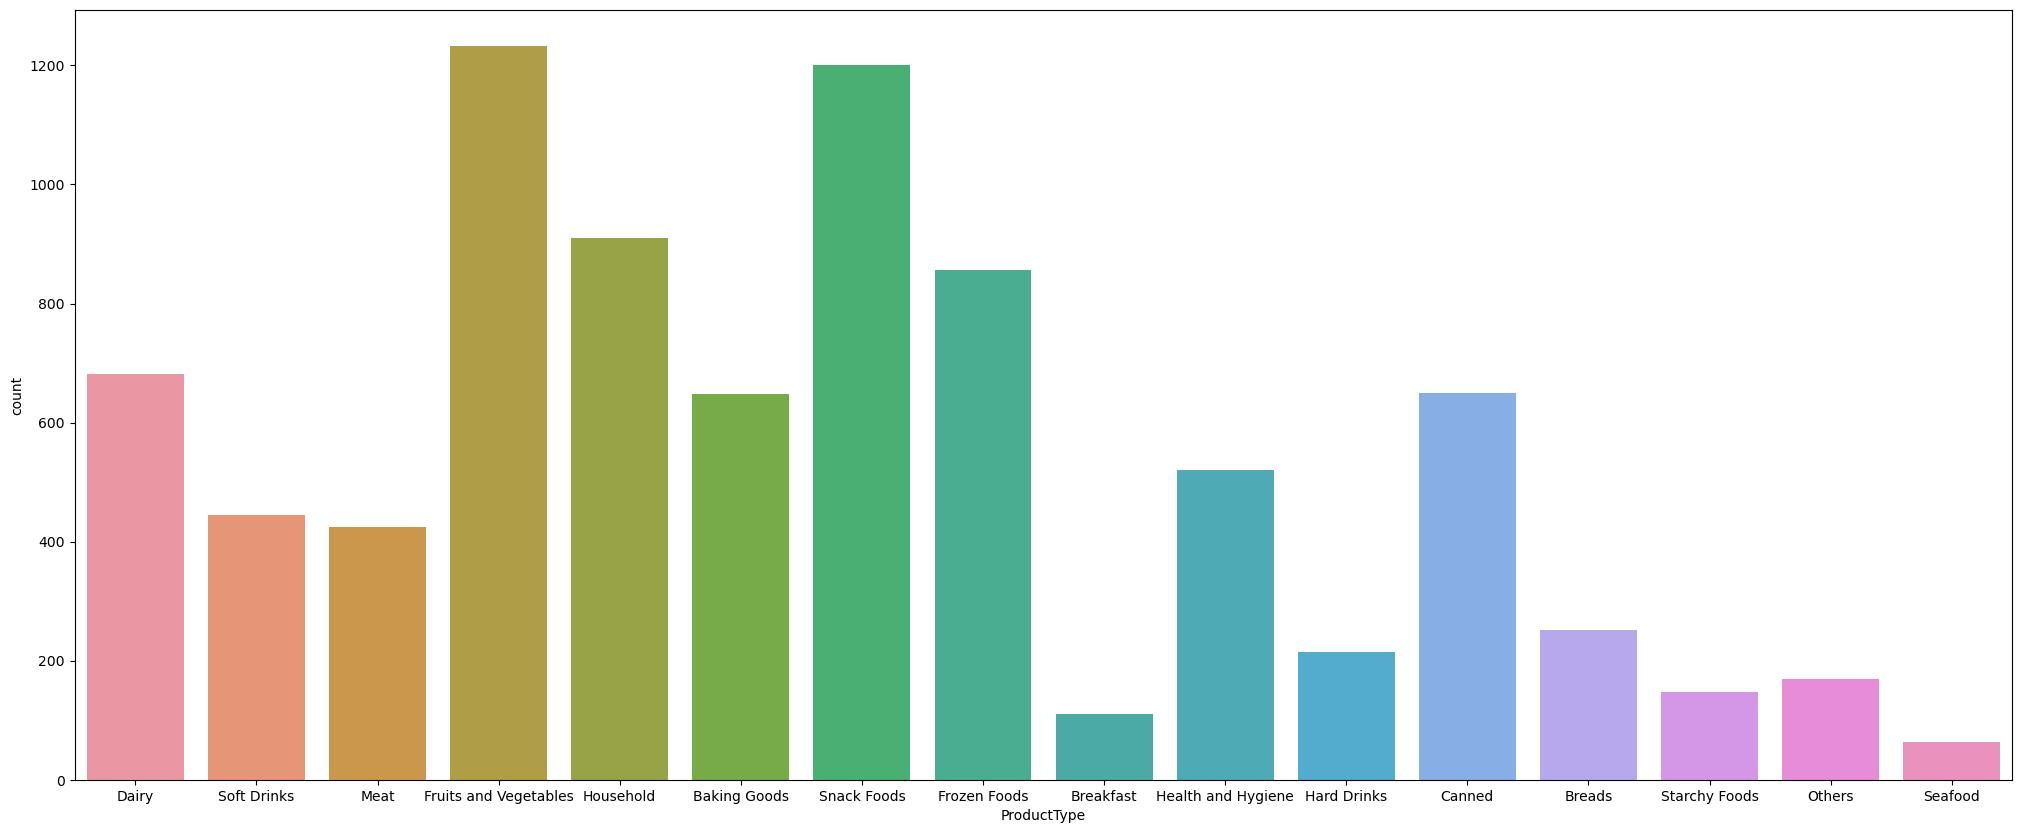

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(df['ProductType'])

<AxesSubplot:xlabel='ProductVisibility', ylabel='Density'>

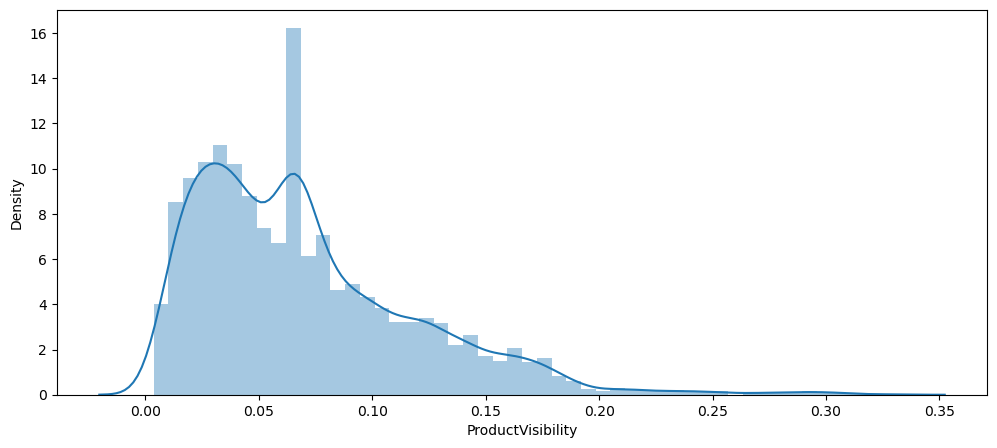

In [36]:
plt.figure(figsize=(12,5))
sns.distplot(df['ProductVisibility'])

<AxesSubplot:xlabel='MRP', ylabel='Density'>

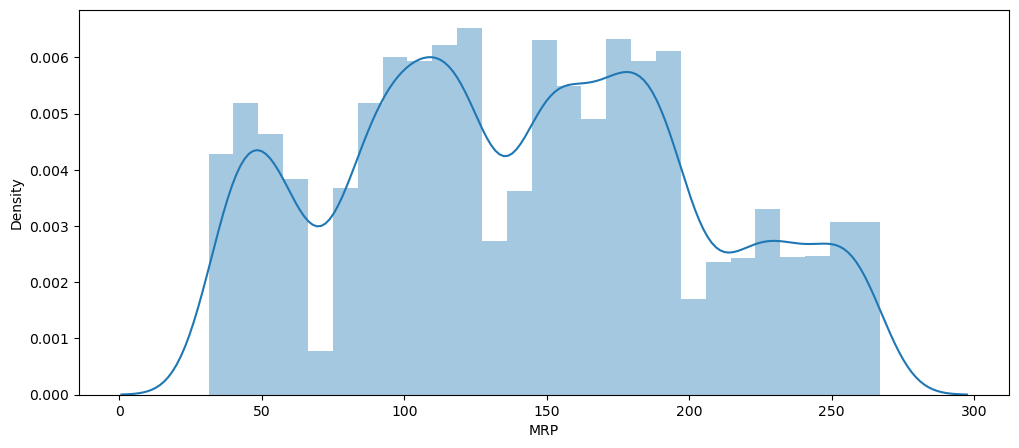

In [37]:
plt.figure(figsize=(12,5))
sns.distplot(df['MRP'])

<AxesSubplot:xlabel='EstablishmentYear', ylabel='count'>

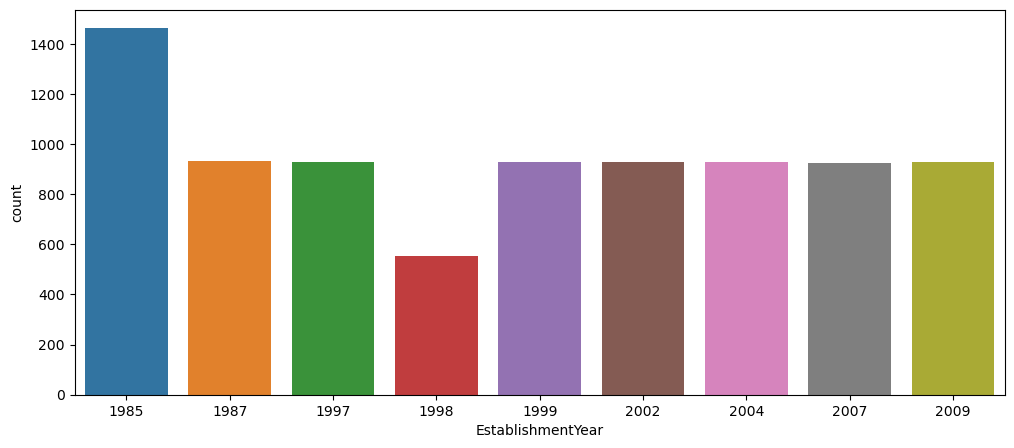

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(df['EstablishmentYear'])

<AxesSubplot:xlabel='OutletSize', ylabel='count'>

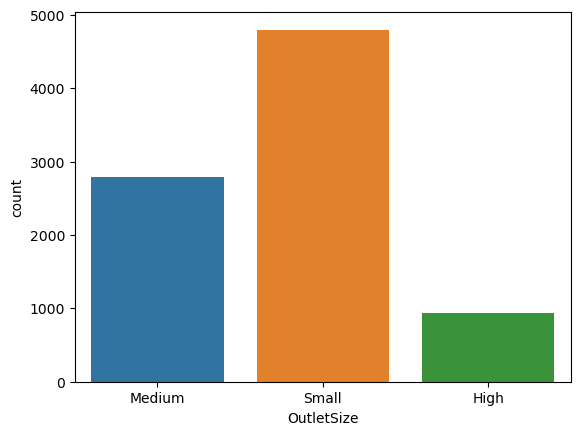

In [39]:
sns.countplot(df['OutletSize'])

<AxesSubplot:xlabel='OutletSales', ylabel='Density'>

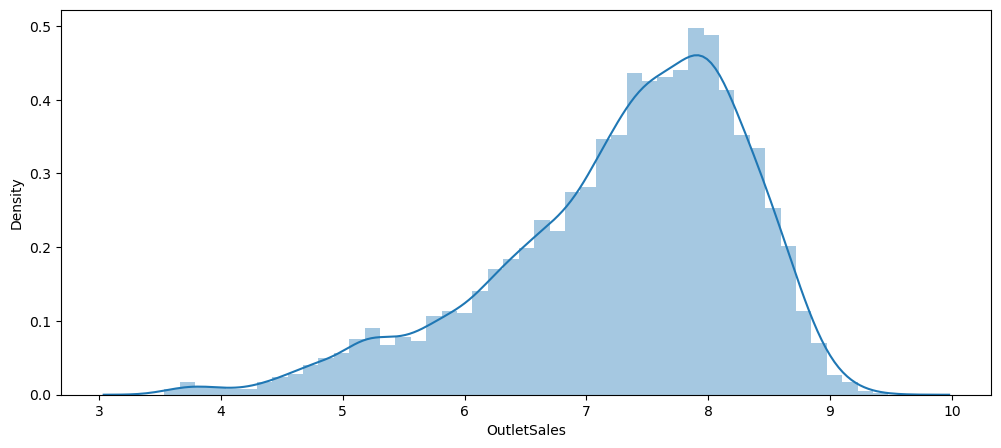

In [40]:
plt.figure(figsize=(12,5))
sns.distplot(df['OutletSales'])

<AxesSubplot:xlabel='LocationType', ylabel='count'>

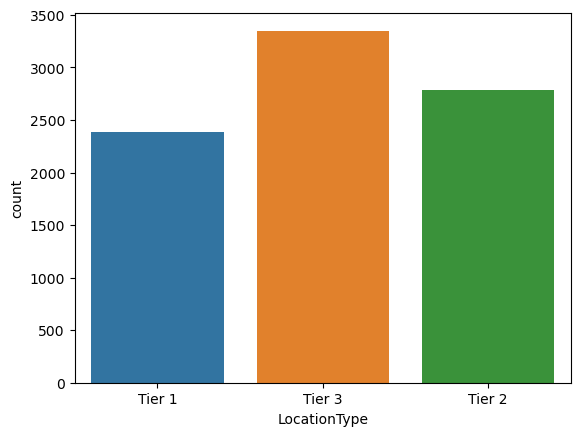

In [41]:
sns.countplot(df['LocationType'])

<AxesSubplot:xlabel='OutletType', ylabel='count'>

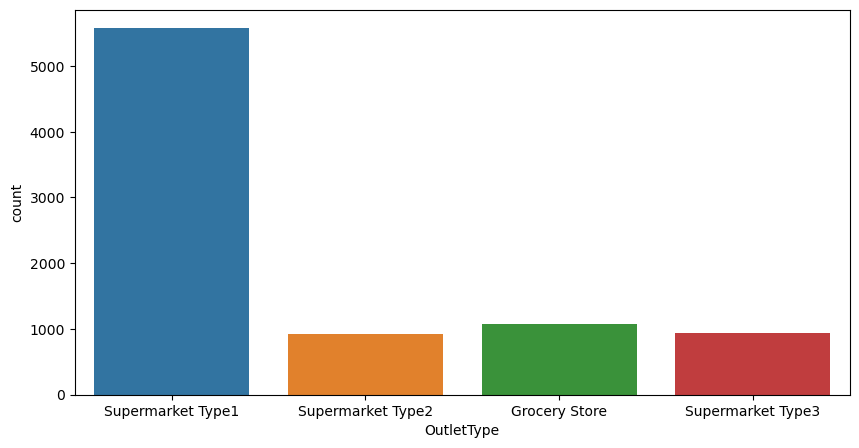

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df['OutletType'])

<AxesSubplot:xlabel='New_ProductType', ylabel='count'>

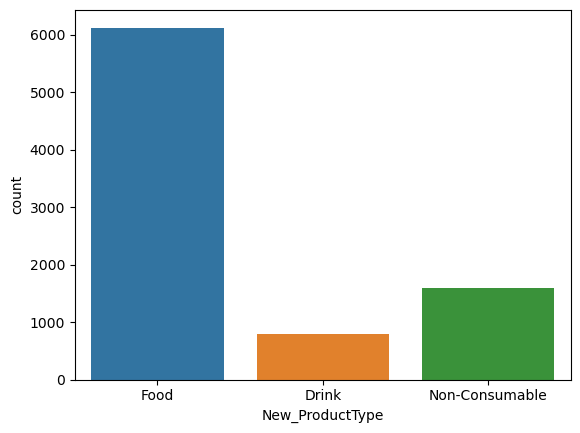

In [43]:
sns.countplot(df['New_ProductType'])

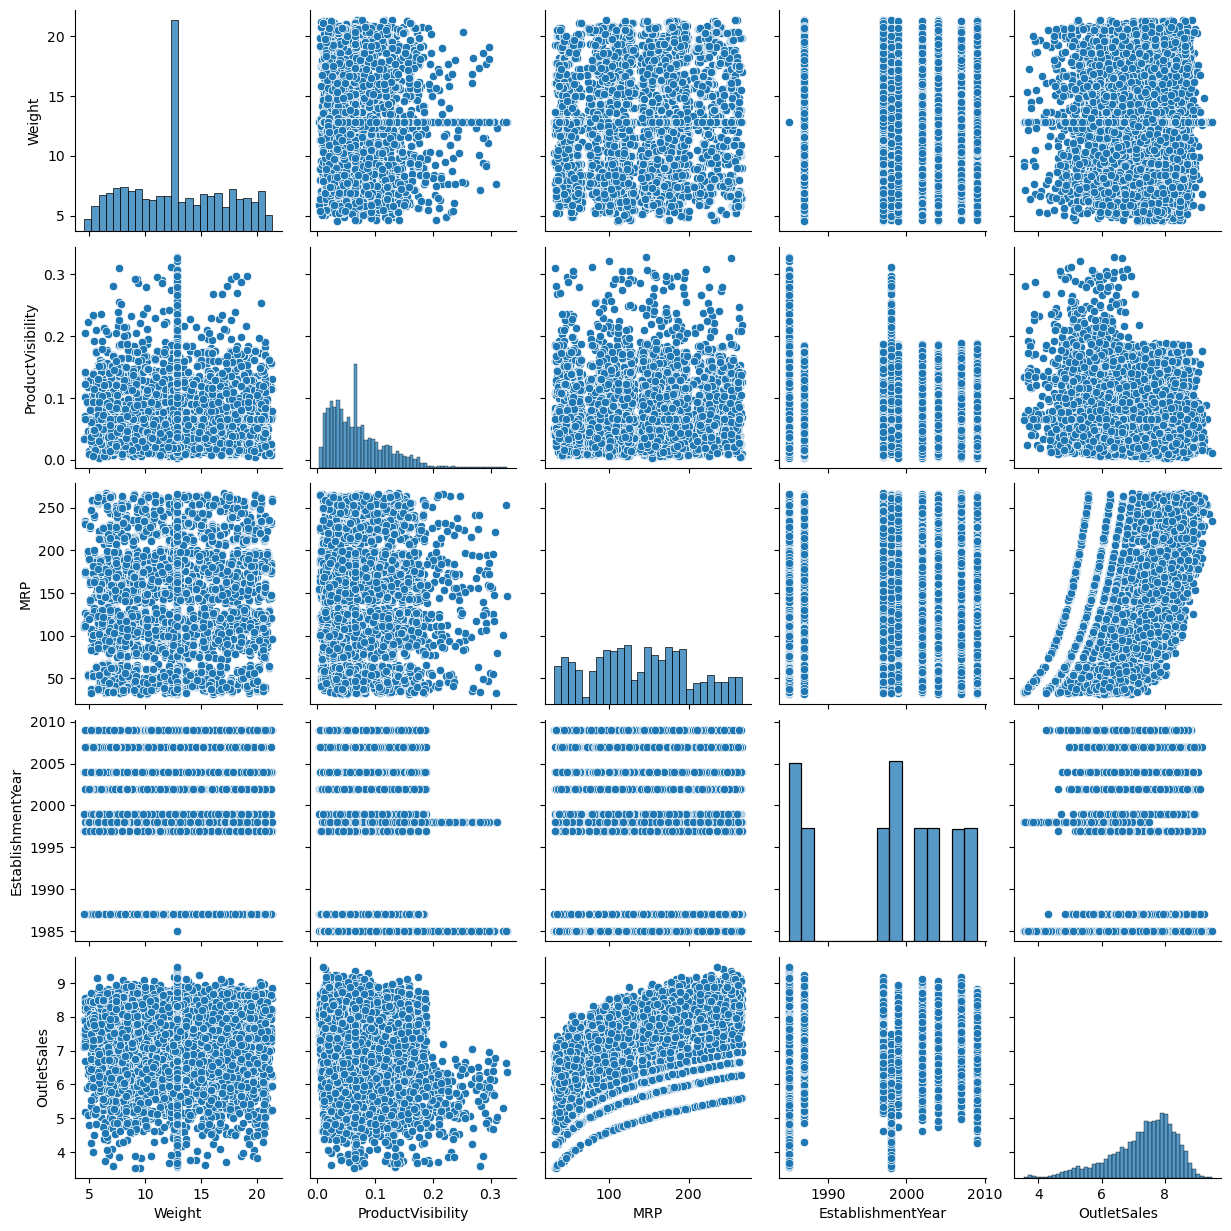

In [44]:
sns.pairplot(df)

## Correlation Matrix<br>
Pandas library contains correlation function corr() to find correlation matrix.


<AxesSubplot:>

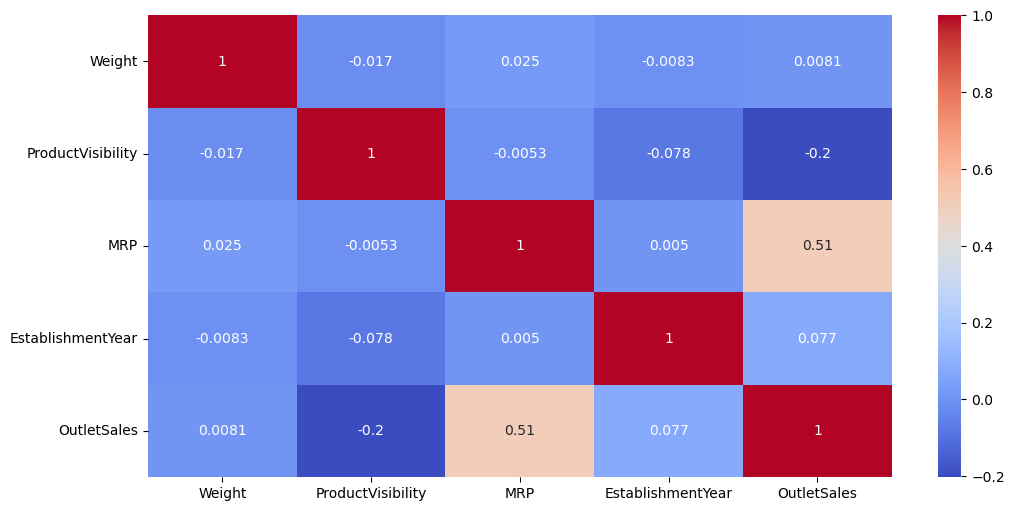

In [45]:
plt.figure(figsize=(12,6))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [46]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,New_ProductType
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable


## Label Encoding 

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['OutletID'])
cat_col = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType', 'New_ProductType']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

## Onehot Encoding

In [48]:
df = pd.get_dummies(df, columns=['FatContent', 'OutletSize', 'LocationType', 'OutletType', 'New_ProductType'])

In [49]:
df.head()

,ProductID,Weight,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSales,Outlet,FatContent_0,...,LocationType_0,LocationType_1,LocationType_2,OutletType_0,OutletType_1,OutletType_2,OutletType_3,New_ProductType_0,New_ProductType_1,New_ProductType_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,1,0,...,0,0,1,0,1,0,0,0,0,1


## Train Test Split

In [50]:
X = df.drop(columns=['EstablishmentYear', 'ProductID', 'OutletID', 'OutletSales'])
y = df['OutletSales']

## Model Training

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    # Train the model
    model.fit(X, y)         
    
    # Predict the model
    pred = model.predict(X)
    
    # Perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('MSE:', mean_squared_error(y, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 0.042706329791956765
CV Score: 0.31169849266524113


<AxesSubplot:title={'center':'Feature Importance'}>

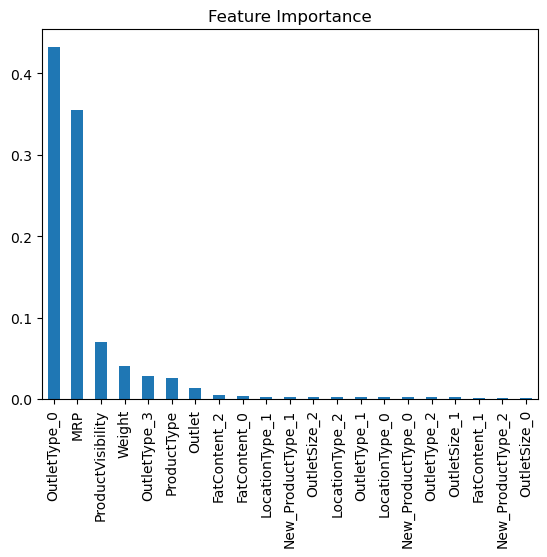

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.2885747694767333
CV Score: 0.2894840214773652


<AxesSubplot:title={'center':'Model Coefficients'}>

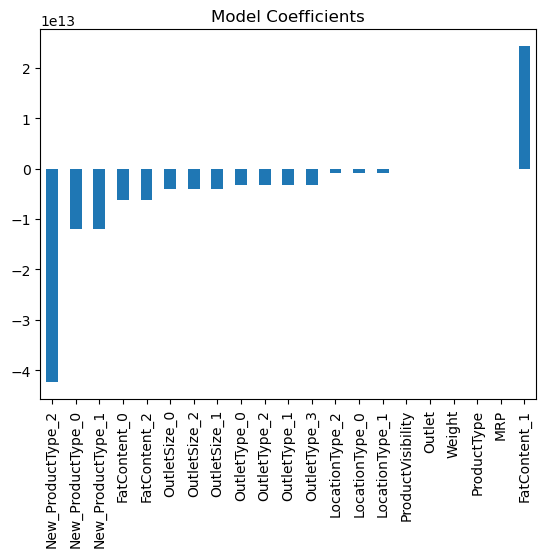

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = "Model Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

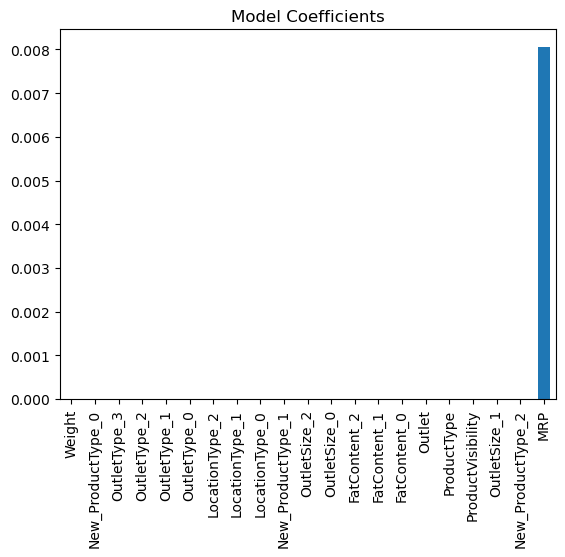

In [54]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = "Model Coefficients")

Model Report
MSE: 0.42814931908832504
CV Score: 0.42901805562686884


<AxesSubplot:title={'center':'Model Coefficients'}>

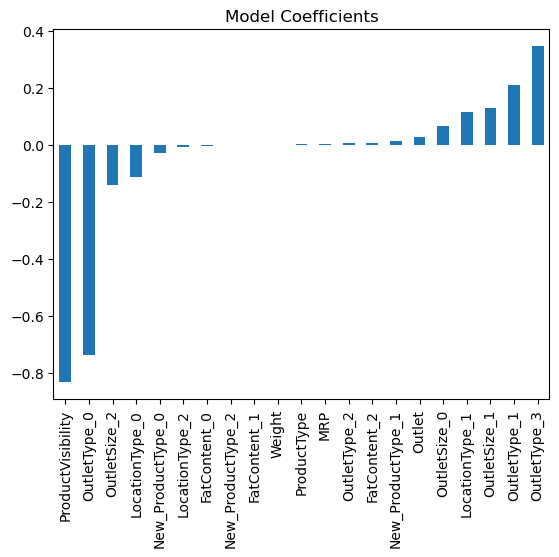

In [55]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = "Model Coefficients")

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.3336657255206169


<AxesSubplot:title={'center':'Feature Importance'}>

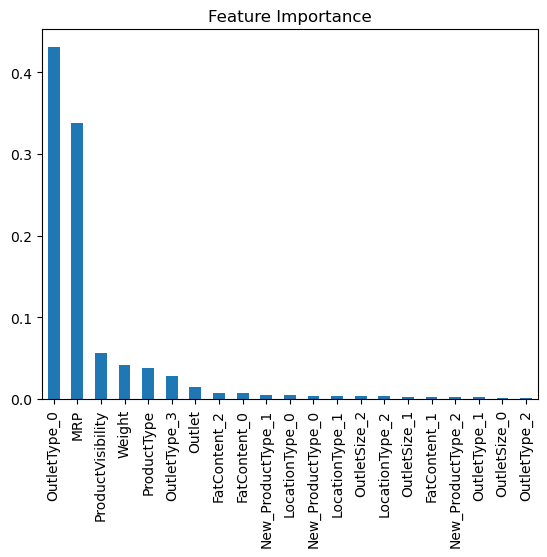

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.575804931284237


<AxesSubplot:title={'center':'Feature Importance'}>

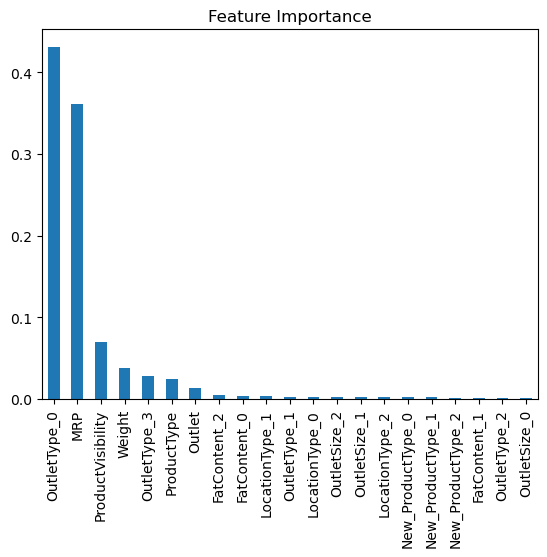

In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title = "Feature Importance")

## Thank You .........